<a href="https://colab.research.google.com/github/JoshStrother/DataVisualization/blob/main/RecreatingTheMasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

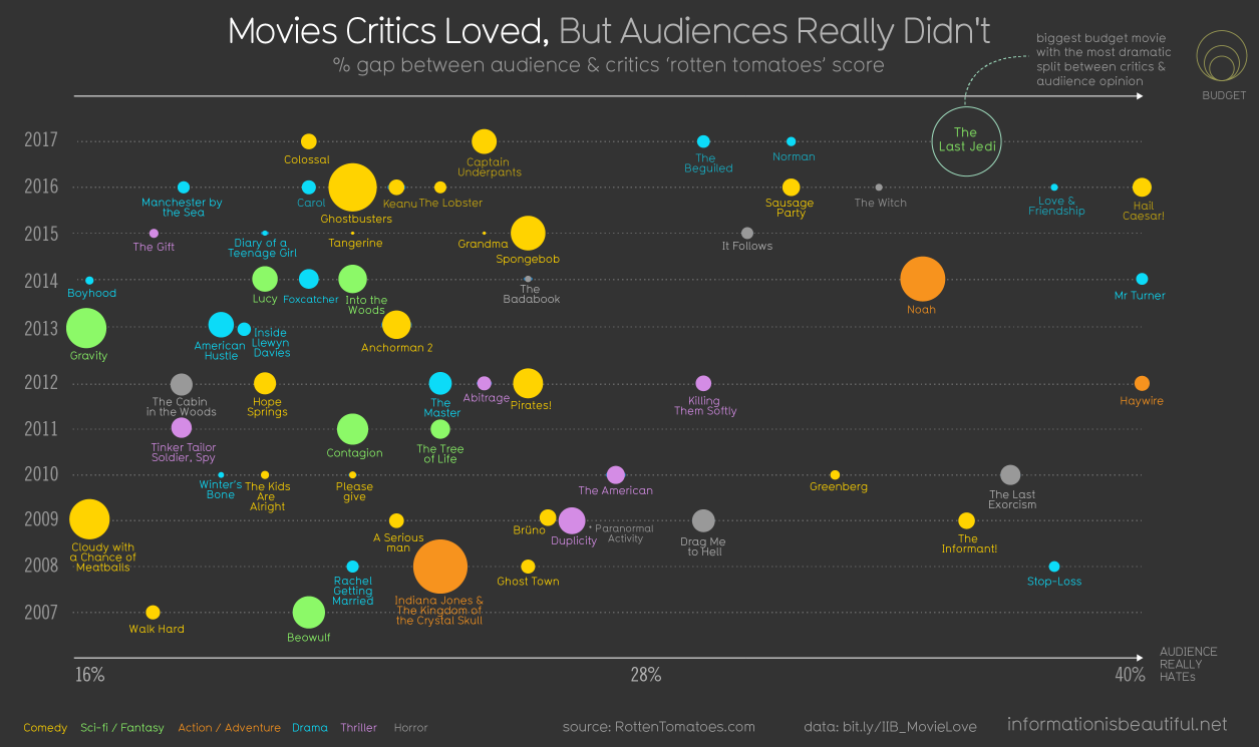 Here is the image I am trying to recreate.

Let's gather our possible libraries and our data.

The data I uploaded to my github in order to pull it as a csv, if you click the link in the .read_csv it will say not found because there is an apostrophe in the name Didn't.  So in order for me to pull it i had to escape the apostrophe with \\ 

In [15]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pa.read_csv('https://raw.githubusercontent.com/JoshStrother/DataVisualization/main/Movies%20Critics%20Love%2C%20but%20Audiences%20Really%20Didn\'t%20-%20movies.csv')

df.head()


Film  Rotten Tomatoes critics %  \
0              Kill Your Darlings                         76   
1                         Boyhood                         97   
2  Cloudy w/ Chance of Meatballs                          87   
3                         Gravity                         96   
4                        The Gift                         92   

   Rotten Tomatoes Audience %  % gap Budget ($million)  Year  \
0                          60     16                 2  2013   
1                          81     16                 4  2014   
2                          71     16               100  2009   
3                          80     16               100  2013   
4                          75     17                 5  2015   

                                 Genre  source: Rotten Tomatoes  
0  Biography, Drama, Thriller, Romance                      NaN  
1                                drama                      NaN  
2            animation, comedy, family                      NaN  
3     Sci-Fi, Drama, Mystery, Thriller                      NaN  
4                             thriller                      NaN

Right away, it looks like I might need to remove the source column, maybe not though.  And as for the Genre column I will have to see if its the first one listed that applies on the masters graph.  And then I will see if it will do it automatically or if I will have to clean up that column some.

In [16]:
ax = sns.scatterplot(data = df, x = '% gap', y = 'Year')

Looking between this initial and the masters, it looks like some data was either just removed for the clarity of the graph or it is hidden behind some of the larger bubbles.  I will have to get more of the style on here and then re-evaluate what is going on.

In [17]:
ax = sns.scatterplot(data = df, x = '% gap', y = 'Year', hue='Genre', size='Budget ($million)')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Alright looks like I will have to clean up the Genre column.


In [18]:
df.Film.agg('count')

92

After looking between the data and the masters, it looks like there are only 50ish films pictured and 92 sets of data. As well as there being discrepencies between the genre.

The first thing I will do is remove the movies that are not graphed.

For this I opened the excel sheet and removed all rows of movies that were there and then i had to figure out the index of the movies that were left to remove them from the dataframe.

In [19]:
df1 = df.drop(labels=[0,5,7,8,10,11,13,15,16,17,20,21,25,27,29,32,39,40,43,44,47,48,55,56,57,65,68,69,74,76,77,91], axis=0)
df1.Film.agg('count')

60

In [20]:
ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre', size='Budget ($million)')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

This is closer, but now we need to fix the genre discepencies.  I will do so by getting the index and running a loop to change the value based on the genre.  There was also a budget that had a "?" in it

In [21]:
Drama = [1,9,18,19,22,23,30,31,37,51,73,79,86,87,88]
for i in Drama:
  df1.loc[i,"Genre"]="Drama"

Comedy = [2,6,24,26,34,35,36,42,45,46,49,50,54,59,61,62,63,66,78,80,83,89]
for i in Comedy:
  df1.loc[i,"Genre"]="Comedy"

Sci = [3,28,33,38,41,52,84]
for i in Sci:
  df1.loc[i,"Genre"]="Sci-Fi/Fantasy"

Action = [53,82,90]
for i in Action:
  df1.loc[i,"Genre"]="Action/Adventure"

Thriller = [4,12,58,67,70,71]
for i in Thriller:
  df1.loc[i,"Genre"]="Thriller"

Horror = [14,60,64,72,75,81,85]
for i in Horror:
  df1.loc[i,"Genre"]="Horror"

df1.loc[84, "Budget ($million)"] = 300

Now that I hard coded the indexes, I will figure out the background colors and border.

In [22]:
plt.figure(facecolor=(.2,.2,.2))

ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre', 
                     hue_order=["Comedy","Sci-Fi/Fantasy","Action/Adventure","Drama","Thriller","Horror"], 
                     size=df1['Budget ($million)'].astype(float), 
                     palette=['Gold', 'Lime', 'Orange', 'Cyan', 'Orchid', 'Grey'])
ax.set_facecolor((.2,.2,.2))
sns.despine(bottom = True, left = True)

h,l = ax.get_legend_handles_labels()
plt.legend(h[1:7],l[1:7], ncol=6, bbox_to_anchor=(1.3, -0.1))


ax.grid(False)

Now I want to try to get the titles on the axis and the main title right.

In [23]:
#changes color of background outside of figure
plt.figure(facecolor=(.2,.2,.2))

#sets the color, size of point, and data
ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre', 
                     hue_order=["Comedy","Sci-Fi/Fantasy","Action/Adventure","Drama","Thriller","Horror"], 
                     size=df1['Budget ($million)'].astype(float), 
                     palette=['Gold', 'Lime', 'Orange', 'Cyan', 'Orchid', 'Grey'])

#changes background inside of figure and then removes the border
ax.set_facecolor((.2,.2,.2))
sns.despine(bottom = True, left = True)

#changes color of x and y tick marks
ax.tick_params(axis='x', colors=(.7,.7,.7))
ax.tick_params(axis='y', colors=(.7,.7,.7))



#moves the legend, changes color, and removes border
h,l = ax.get_legend_handles_labels()
leg = plt.legend(h[1:7],l[1:7], ncol=6, bbox_to_anchor=(1.3, -0.1), facecolor=(.2,.2,.2), frameon= False)

#removes the x and y axis title
plt.xlabel('')
plt.ylabel('')
plt.title('Movie Critics Loved, But Audiences Really Didn\'t \n %gap between audiences & critics \'rotten tomatoes\' score', color='white')
plt.show()

Next we want to get our legend fixed once more...

In [24]:
#changes color of background outside of figure
plt.figure(facecolor=(.2,.2,.2))

#sets the color, size of point, and data
ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre', 
                     hue_order=["Comedy","Sci-Fi/Fantasy","Action/Adventure","Drama","Thriller","Horror"], 
                     size=df1['Budget ($million)'].astype(float), 
                     palette=['Gold', 'Lime', 'Orange', 'Cyan', 'Orchid', 'Grey'])

#changes background inside of figure and then removes the border
ax.set_facecolor((.2,.2,.2))
sns.despine(bottom = True, left = True)


#changes color of x and y tick marks
ax.tick_params(axis='x', colors=(.7,.7,.7))
ax.tick_params(axis='y', colors=(.7,.7,.7))


#moves the legend, changes color, and removes border
h,l = ax.get_legend_handles_labels()
leg = plt.legend(h[1:7],l[1:7], ncol=6, bbox_to_anchor=(1.3, -0.1), facecolor=(.2,.2,.2), frameon= False)

#changes the color of text in the legend
text = leg.get_texts()
plt.setp(text[0], color='Gold')
plt.setp(text[1], color='Lime')
plt.setp(text[2], color='Orange')
plt.setp(text[3], color='Cyan')
plt.setp(text[4], color='Orchid')
plt.setp(text[5], color='Grey')

#removes the circles of color in the legend
for item in leg.legendHandles:
    item.set_visible(False)

#Removes grids
ax.grid(False)

#removes the x and y axis title
plt.xlabel('')
plt.ylabel('')
plt.title('Movie Critics Loved, But Audiences Really Didn\'t \n %gap between audiences & critics \'rotten tomatoes\' score', color='white')
plt.show()

Now I will add the title of the movies to the scatter plot

In [28]:
#changes color of background outside of figure
plt.figure(facecolor=(.2,.2,.2))

#sets the color, size of point, and data
ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre', 
                     hue_order=["Comedy","Sci-Fi/Fantasy","Action/Adventure","Drama","Thriller","Horror"], 
                     size=df1['Budget ($million)'].astype(float), 
                     palette=['Gold', 'Lime', 'Orange', 'Cyan', 'Orchid', 'Grey'])

#changes background inside of figure and then removes the border
ax.set_facecolor((.2,.2,.2))
sns.despine(bottom = True, left = True)


#changes color of x and y tick marks
ax.tick_params(axis='x', colors=(.7,.7,.7))
ax.tick_params(axis='y', colors=(.7,.7,.7))


#moves the legend, changes color, and removes border
h,l = ax.get_legend_handles_labels()
leg = plt.legend(h[1:7],l[1:7], ncol=6, bbox_to_anchor=(1.1, -0.1), facecolor=(.2,.2,.2), frameon= False)

#changes the color of text in the legend
text = leg.get_texts()
plt.setp(text[0], color='Gold')
plt.setp(text[1], color='Lime')
plt.setp(text[2], color='Orange')
plt.setp(text[3], color='Cyan')
plt.setp(text[4], color='Orchid')
plt.setp(text[5], color='Grey')

#removes the circles of color in the legend
for item in leg.legendHandles:
    item.set_visible(False)

#adds title to points
x=df['% gap']
y=df['Year']
text = df['Film']
for i in range(len(x)):
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5)) 


#Removes grids
ax.grid(False)

#removes the x and y axis title
plt.xlabel('')
plt.ylabel('')
plt.title('Movie Critics Loved, But Audiences Really Didn\'t \n %gap between audiences & critics \'rotten tomatoes\' score', color='white')
plt.show()

            

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


We could try to either A. change the font size or B. change the size of the figure.  I may do both, either way I will also need to change the color of the text of the title.

Edit: I noticed that there was extreme overlapping of titles and its because I was pulling all titles instead of only the ones on the plot..this is now fixed in the following code.

In [26]:
#changes color of background outside of figure
plt.figure(facecolor=(.2,.2,.2), )

#sets the color, size of point, and data
ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre',
                     hue_order=["Comedy","Sci-Fi/Fantasy","Action/Adventure","Drama","Thriller","Horror"], 
                     size=(df1['Budget ($million)'].astype(float)*100), 
                     palette=['Gold', 'Lime', 'Orange', 'Cyan', 'Orchid', 'Grey'])

#changes background inside of figure and then removes the border
ax.set_facecolor((.2,.2,.2))
sns.despine(bottom = True, left = True)


#changes color of x and y tick marks
ax.tick_params(axis='x', colors=(.7,.7,.7))
ax.tick_params(axis='y', colors=(.7,.7,.7))


#moves the legend, changes color, and removes border
h,l = ax.get_legend_handles_labels()
leg = plt.legend(h[1:7],l[1:7], ncol=6, bbox_to_anchor=(0.6, -0.1), facecolor=(.2,.2,.2), frameon= False)

#changes the color of text in the legend
text = leg.get_texts()
plt.setp(text[0], color='Gold')
plt.setp(text[1], color='Lime')
plt.setp(text[2], color='Orange')
plt.setp(text[3], color='Cyan')
plt.setp(text[4], color='Orchid')
plt.setp(text[5], color='Grey')

#removes the circles of color in the legend
for item in leg.legendHandles:
    item.set_visible(False)

#gathering rows for each Genre to change color of titles
co = df1.loc[df1['Genre'] == "Comedy"]
sc = df1.loc[df1['Genre'] == "Sci-Fi/Fantasy"]
ac = df1.loc[df1['Genre'] == "Action/Adventure"]
dr = df1.loc[df1['Genre'] == "Drama"]
th = df1.loc[df1['Genre'] == "Thriller"]
ho = df1.loc[df1['Genre'] == "Horror"]


#adds titles to points with their respective colors
x=co['% gap']
y=co['Year']
text = co['Film']
for i in co['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Gold',size=10) 

x=sc['% gap']
y=sc['Year']
text = sc['Film']
for i in sc['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Lime', size=10) 

x=ac['% gap']
y=ac['Year']
text = ac['Film']
for i in ac['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Orange', size=10) 

x=dr['% gap']
y=dr['Year']
text = dr['Film']
for i in dr['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Cyan', size=10) 

x=th['% gap']
y=th['Year']
text = th['Film']
for i in th['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Orchid', size=10)

x=ho['% gap']
y=ho['Year']
text = ho['Film']
for i in ho['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Grey', size=10)  

#rescale the figure
sns.set(rc={"figure.figsize":(18,10)})

#Removes grids
ax.grid(False)

#set limits of plot
plt.xlim([14, 42])
plt.ylim([2006, 2018])

#removes the x and y axis title
plt.xlabel('')
plt.ylabel('')
plt.title('Movie Critics Loved, But Audiences Really Didn\'t \n %gap between audiences & critics \'rotten tomatoes\' score', color='white')
plt.show()


So I attempted to change the size by multiplying the budget by 100 but the circles are still the same size... moving on.

Now for the nitpicking I will try to set the x and y axis to show exacly like in the masters.

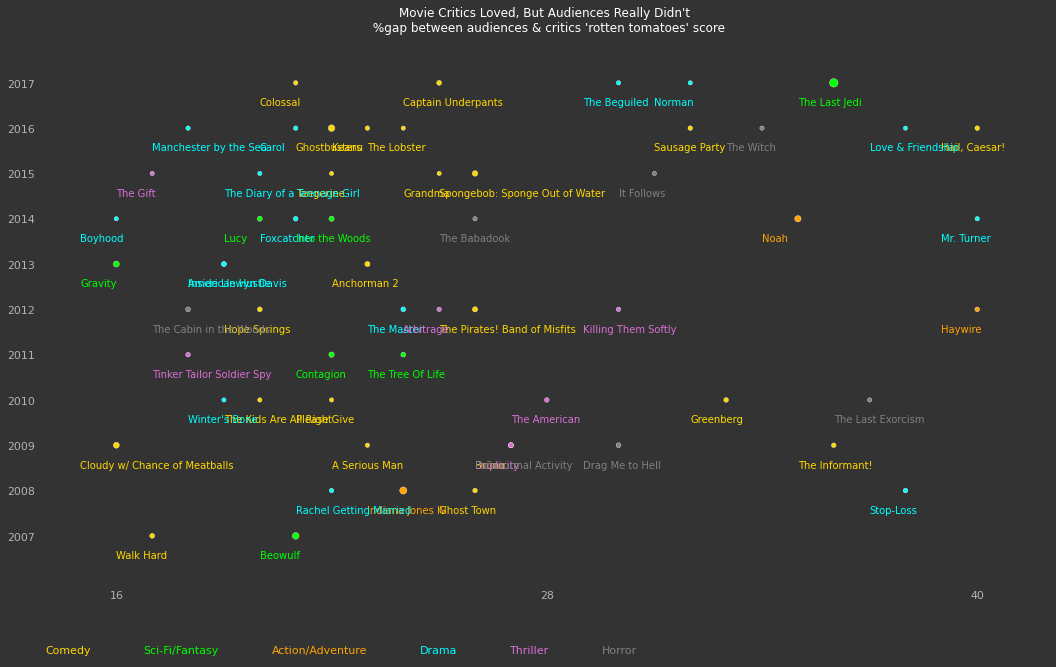

In [27]:
#changes color of background outside of figure
plt.figure(facecolor=(.2,.2,.2), )

#sets the color, size of point, and data
ax = sns.scatterplot(data = df1, x = '% gap', y = 'Year', hue='Genre',
                     hue_order=["Comedy","Sci-Fi/Fantasy","Action/Adventure","Drama","Thriller","Horror"], 
                     size=(df1['Budget ($million)'].astype(float)*100), 
                     palette=['Gold', 'Lime', 'Orange', 'Cyan', 'Orchid', 'Grey'])

#changes background inside of figure and then removes the border
ax.set_facecolor((.2,.2,.2))
sns.despine(bottom = True, left = True)


#changes color of x and y tick marks
ax.tick_params(axis='x', colors=(.7,.7,.7))
ax.tick_params(axis='y', colors=(.7,.7,.7))


#moves the legend, changes color, and removes border
h,l = ax.get_legend_handles_labels()
leg = plt.legend(h[1:7],l[1:7], ncol=6, bbox_to_anchor=(0.6, -0.1), facecolor=(.2,.2,.2), frameon= False)

#changes the color of text in the legend
text = leg.get_texts()
plt.setp(text[0], color='Gold')
plt.setp(text[1], color='Lime')
plt.setp(text[2], color='Orange')
plt.setp(text[3], color='Cyan')
plt.setp(text[4], color='Orchid')
plt.setp(text[5], color='Grey')

#removes the circles of color in the legend
for item in leg.legendHandles:
    item.set_visible(False)

#gathering rows for each Genre to change color of titles
co = df1.loc[df1['Genre'] == "Comedy"]
sc = df1.loc[df1['Genre'] == "Sci-Fi/Fantasy"]
ac = df1.loc[df1['Genre'] == "Action/Adventure"]
dr = df1.loc[df1['Genre'] == "Drama"]
th = df1.loc[df1['Genre'] == "Thriller"]
ho = df1.loc[df1['Genre'] == "Horror"]


#adds titles to points with their respective colors
x=co['% gap']
y=co['Year']
text = co['Film']
for i in co['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Gold',size=10) 

x=sc['% gap']
y=sc['Year']
text = sc['Film']
for i in sc['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Lime', size=10) 

x=ac['% gap']
y=ac['Year']
text = ac['Film']
for i in ac['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Orange', size=10) 

x=dr['% gap']
y=dr['Year']
text = dr['Film']
for i in dr['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Cyan', size=10) 

x=th['% gap']
y=th['Year']
text = th['Film']
for i in th['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Orchid', size=10)

x=ho['% gap']
y=ho['Year']
text = ho['Film']
for i in ho['Film'].index:
  plt.annotate(text[i], (x[i]-1.0, y[i] - 0.5), color='Grey', size=10)  


#rescale the figure
sns.set(rc={"figure.figsize":(200,200)})

#Removes grids
ax.grid(False)

#set limits of plot
plt.xlim([14, 42])
plt.ylim([2006, 2018])


ex = np.arange(16, 41, 12)
why =np.arange(2007, 2018, 1)
plt.xticks(ex)
plt.yticks(why)

#removes the x and y axis title
plt.xlabel('')
plt.ylabel('')
plt.title('Movie Critics Loved, But Audiences Really Didn\'t \n %gap between audiences & critics \'rotten tomatoes\' score', color='white')
plt.show()


I will now try to get the budget legend in the top corner and get the last few annotations that says "AUDIENCE REALLY HATEs" and "biggest budget movie....audiience opinion" (there is a misspelling in the original).

EDIT:  After over an hour of trying to get the budget then failing and trying to get more annotations, the plot only broke and continued to get worse.


EDIT 2:  After coming back and attempitng once more, nothing.. The ABOVE graph is my final take.

##Resources

https://colab.research.google.com/drive/1J4fB9b03BDN91ayZARXal82IXUl2jmEu#scrollTo=6kSQ6IqjItOP basic scatter plot styling

https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/ removing rows

https://predictivehacks.com/?all-tips=replace-values-based-on-index-in-pandas-dataframes#:~:text=You%20can%20easily%20replace%20a,its%20column%20and%20its%20index.&text=Having%20the%20dataframe%20above%2C%20we,the%20loc%20function%20of%20pandas. iloc

https://www.datacamp.com/tutorial/for-loops-in-python loops

https://stackoverflow.com/questions/60811030/how-to-remove-specific-part-of-legend-seaborn-scatterplot legend clean up

https://stackoverflow.com/questions/54870585/matplotlib-how-to-show-legend-elements-horizontally legend horizontal

https://stackoverflow.com/questions/55026154/seaborn-set-style-removes-the-border-configured-by-despine remove border of figure

https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color colors
https://stackoverflow.com/questions/4761623/how-to-change-the-color-of-the-axis-ticks-and-labels-for-a-plot-in-matplotlib axis colors

https://stackoverflow.com/questions/25123127/how-do-you-just-show-the-text-label-in-plot-legend-e-g-remove-a-labels-line removes circle in legend

https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/ add title to points

https://www.tutorialspoint.com/how-to-make-matplotlib-show-all-x-coordinates x and y ticks